<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="../../figures/PDSH-cover-small.png">

*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

# Visualization with Seaborn Assignment

## Exploring Marathon Finishing Times

Here we'll look at using Seaborn to help visualize and understand finishing results from a marathon.
Jake has scraped the data from sources on the Web, aggregated it and removed any identifying information, and put it on GitHub where it can be downloaded.

Your instructor has downloaded the data from GitHub and included it in the same folder as this notebook.
If they had not been included, you would need to download the CSV data with the command

    curl -O https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv

In [1]:
# Import all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
plt.style.use('classic')
%matplotlib inline
import seaborn as sns
sns.set()

### Load the data and examine a sample

In [2]:
data = pd.read_csv('marathon-data.csv')
data

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59
...,...,...,...,...
37245,18,M,04:24:24,09:32:57
37246,36,M,04:35:43,09:33:28
37247,51,M,04:22:35,09:33:40
37248,55,W,04:58:06,10:00:40


### 1. What `type` are the `split` and `final` attributes of the dataframe?

By default, Pandas would have loaded the time columns as Python strings (type `object`); confirm this by  looking at the `dtypes` attribute of the DataFrame `data`.

In [3]:
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

### 2. Convert the `split` and `final` attributes to `datetime.timedelta`.

Write a converter to convert strings into timedeltas. Confirm that `split` and `final` attributes of the dataframe are now `timedelta64[ns]`.

In [4]:
def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return datetime.timedelta(hours=h, minutes=m, seconds=s)

data = pd.read_csv('marathon-data.csv',
                   converters={'split':convert_time, 'final':convert_time})
data.head(3)

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42


In [5]:
data.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

### 3. Time in seconds, and `jointplot`

For the purpose of our Seaborn plotting utilities, let's next add columns `split_sec` and `final_sec` that give the times in seconds.

In [6]:
data.insert(4, 'split_sec', data['split'].astype(int) / 1E9)
data.insert(5, 'final_sec', data['final'].astype(int) / 1E9)
data.head(3)

,age,gender,split,final,split_sec,final_sec
0,33,M,01:05:38,02:08:51,3938.0,7731.0
1,32,M,01:06:26,02:09:28,3986.0,7768.0
2,31,M,01:06:49,02:10:42,4009.0,7842.0


To get an idea of what the data looks like, we can plot a ``jointplot`` over the data:

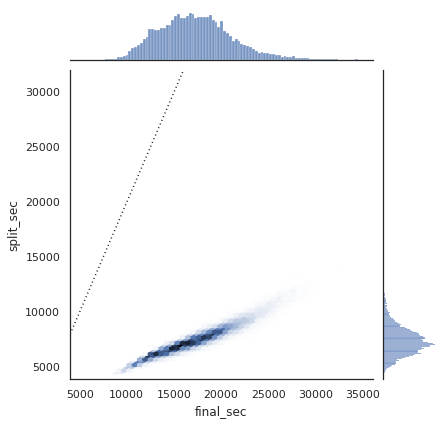

In [7]:
with sns.axes_style('white'):
    g = sns.jointplot(data=data, x="final_sec", y="split_sec", kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000),
                    np.linspace(8000, 32000), ':k')

The dotted line shows where someone's time would lie if they ran the marathon at a perfectly steady pace. The fact that the distribution lies above this indicates (as you might expect) that most people slow down over the course of the marathon.

If you have run competitively, you'll know that those who do the opposite &mdash; run faster during the second half of the race &mdash; are said to have "negative-split" the race.

### 4. Split Fraction

Let's create another column in the data, the split fraction, which measures the degree to which each runner negative-splits or positive-splits the race

In [8]:
data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']
data.head(3)

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,01:05:38,02:08:51,3938.0,7731.0,-0.018756
1,32,M,01:06:26,02:09:28,3986.0,7768.0,-0.026262
2,31,M,01:06:49,02:10:42,4009.0,7842.0,-0.022443


Where this split difference is less than zero, the person negative-split the race by that fraction.
Let's do a distribution plot of this split fraction:

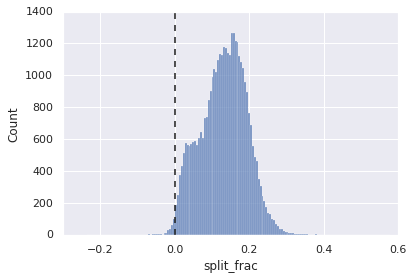

In [9]:
sns.histplot(data['split_frac'], kde=False);
plt.axvline(0, color="k", linestyle="--");

### 5. The number of people who negative-split their marathon

Find the number of people who negative-split their marathon.

In [10]:
sum(data.split_frac < 0)

251

Out of nearly 40,000 participants, there were only 250 people who negative-split their marathon.

Let's see whether there is any correlation between this split fraction and other variables. We'll do this using a ``pairgrid``, which draws plots of all these correlations:

### 6. Pair-grids

Let's see whether there is any correlation between this split fraction and other variables. We'll do this using a `pairgrid`, which draws plots of all these correlations.

Look carefully at the pair grid. Due to the symmetry of the situation, we expect that the age&mdash;split_sec plot to depict the same information as the split_sec&mdash;age plot. Similarly for all pairs. Do you find such symmetry in the grid? Simple checks like this are _essential_ for sanity-checking your results.

**Your answer**

---

---

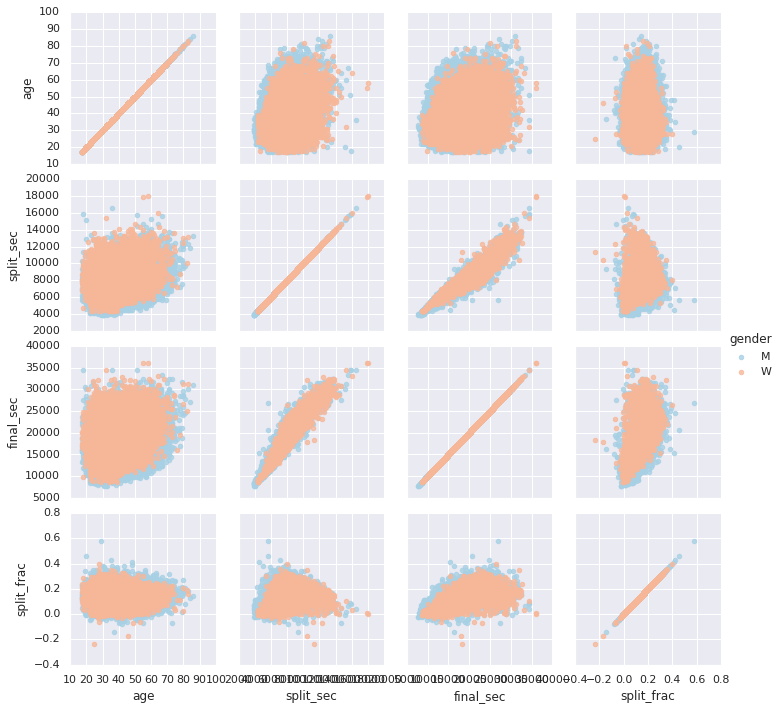

In [11]:
g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'],
                 hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

It looks like the split fraction does not correlate particularly with age, but does correlate with the final time: faster runners tend to have closer to even splits on their marathon time.
(We see here that Seaborn is no panacea for Matplotlib's ills when it comes to plot styles: in particular, the x-axis labels overlap. Because the output is a simple Matplotlib plot, however, the methods in [Customizing Ticks](04.10-Customizing-Ticks.ipynb) can be used to adjust such things if desired.)

The difference between men and women here is interesting. Let's look at the histogram of split fractions for these two groups:

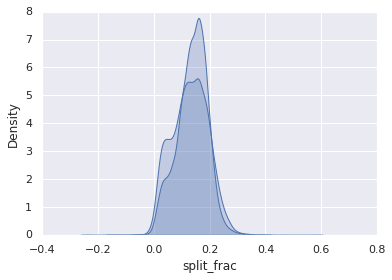

In [12]:
sns.kdeplot(data = data.split_frac[data.gender=='M'], label='men', shade=True)
sns.kdeplot(data = data.split_frac[data.gender=='W'], label='women', shade=True)
plt.xlabel('split_frac');

The interesting thing here is that there are many more men than women who are running close to an even split!
This almost looks like some kind of bimodal distribution among the men and women. Let's see if we can suss-out what's going on by looking at the distributions as a function of age.

A nice way to compare distributions is to use a *violin plot*

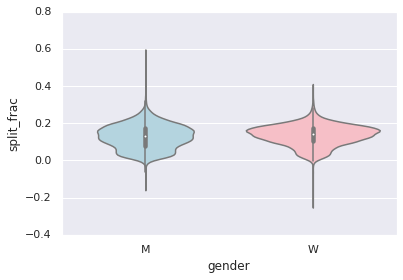

In [13]:
sns.violinplot(x = "gender", y = "split_frac", data=data,
               palette=["lightblue", "lightpink"]);

This is yet another way to compare the distributions between men and women.

Let's look a little deeper, and compare these violin plots as a function of age. We'll start by creating a new column in the array that specifies the decade of age that each person is in:

In [14]:
data['age_dec'] = data.age.map(lambda age: 10 * (age // 10))
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac,age_dec
0,33,M,01:05:38,02:08:51,3938.0,7731.0,-0.018756,30
1,32,M,01:06:26,02:09:28,3986.0,7768.0,-0.026262,30
2,31,M,01:06:49,02:10:42,4009.0,7842.0,-0.022443,30
3,38,M,01:06:16,02:13:45,3976.0,8025.0,0.009097,30
4,31,M,01:06:32,02:13:59,3992.0,8039.0,0.006842,30


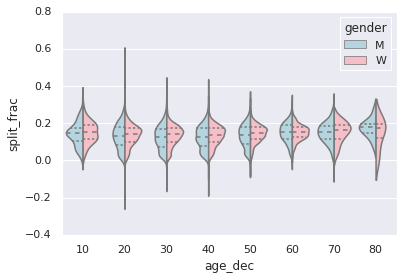

In [15]:
men = (data.gender == 'M')
women = (data.gender == 'W')

with sns.axes_style(style=None):
    sns.violinplot(x="age_dec", y="split_frac", hue="gender", data=data,
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"]);

Looking at this, we can see where the distributions of men and women differ: the split distributions of men in their 20s to 50s show a pronounced over-density toward lower splits when compared to women of the same age (or of any age, for that matter).

Also surprisingly, the 80-year-old women seem to outperform *everyone* in terms of their split time. This is probably due to the fact that we're estimating the distribution from small numbers, as there are only a handful of runners in that range:

In [16]:
(data.age > 80).sum()

7

Back to the men with negative splits: who are these runners? Does this split fraction correlate with finishing quickly? We can plot this very easily. We'll use ``regplot``, which will automatically fit a linear regression to the data:

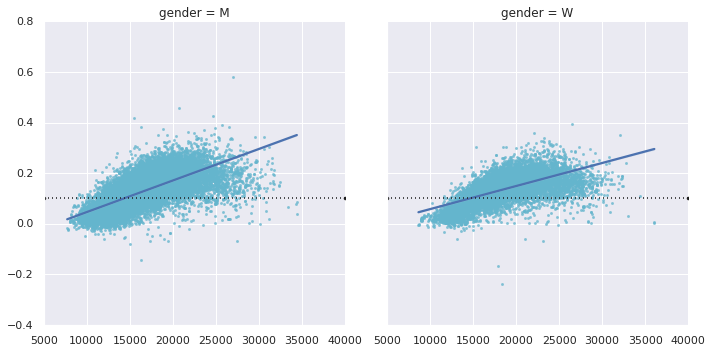

In [17]:
g = sns.lmplot(x='final_sec', y='split_frac', col='gender', data=data,
               markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":");

Apparently the people with fast splits are the elite runners who are finishing within ~15,000 seconds, or about 4 hours. People slower than that are much less likely to have a fast second split.

<!--NAVIGATION-->
< [Geographic Data with Basemap](04.13-Geographic-Data-With-Basemap.ipynb) | [Contents](Index.ipynb) | [Further Resources](04.15-Further-Resources.ipynb) >

<a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.14-Visualization-With-Seaborn.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
